In [2]:
import pandas as pd
from matplotlib import pyplot as plt 

In [6]:
df=pd.read_csv('Price.csv',sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [7]:
#check if the dataframe have any null value
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [8]:
# delete date column as only prices will be used to predict
df=df.drop(columns=["Date"])
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'Predicted Price')

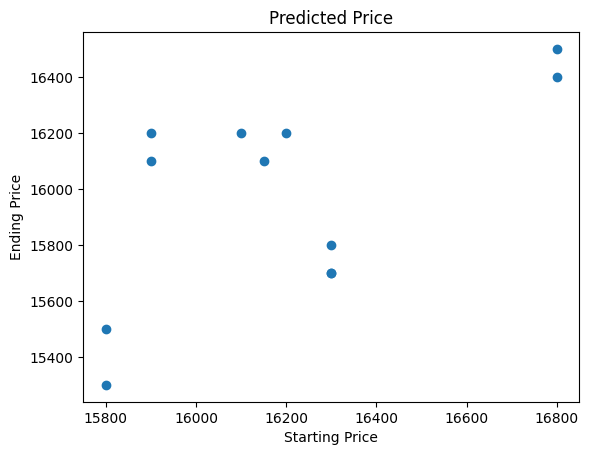

In [9]:
#predict one of the Ending (USD) from all other Starting (USD) and Ending (USD)
#So x=Starting and y=ending and y=mx+c
#using matplotlib to create graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)']) #plt.scatter(df['independent'],df['dependent'])
plt.xlabel('Starting Price')
plt.ylabel('Ending Price')
plt.title('Predicted Price')

In [10]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
#extracting x(independent variable)
# x=df.drop('Ending (USD)',axis=1)
x=df[['Starting (USD)']]
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [12]:
#dependent variable
y=df[['Ending (USD)']]
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


In [13]:
#importing lineargression from scikit learn
from sklearn.linear_model import LinearRegression

In [15]:
#mean value
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [16]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Predicted Price')

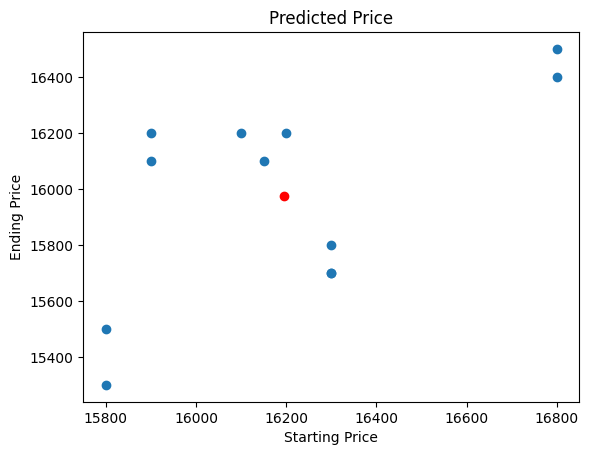

In [17]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting Price')
plt.ylabel('Ending Price')
plt.title('Predicted Price')

In [18]:
#creating an object
reg=LinearRegression()

In [19]:
#training the model
reg.fit(x,y)

LinearRegression()

In [20]:
#y=mx+c where m= coefficent , c= intercept 
m=reg.coef_
c=reg.intercept_
print(f'coefficeint : {m}')
print(f'interception on y axis : {c}')

coefficeint : [[0.65258293]]
interception on y axis : [5405.87555702]


In [21]:
#predict ending price for starting price
predicted_price=m*16700+c
predicted_price

array([[16304.0105628]])

In [22]:
#predicted result
reg.predict([[16700]])

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [23]:
#creating new column 'predicted' 
df['Predicted']=reg.predict(x)
df

,Starting (USD),Ending (USD),Predicted
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Text(0.5, 1.0, 'Predicted Price')

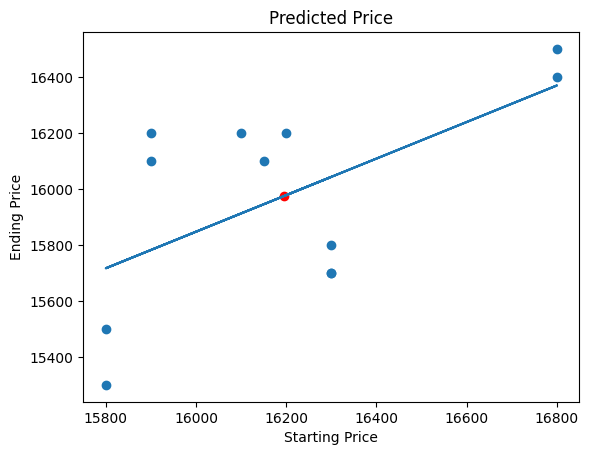

In [24]:
#plotting fit line for the predicted value
plt.plot(x,reg.predict(x))
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.scatter(x.mean(),y.mean(),color='red')
plt.xlabel('Starting Price')
plt.ylabel('Ending Price')
plt.title('Predicted Price')

In [25]:
#loss
df['loss']=df['Ending (USD)']-df['Predicted']
df

,Starting (USD),Ending (USD),Predicted,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389
5,16800,16400,16369.268856,30.731144
6,15900,16200,15781.944215,418.055785
7,15800,15500,15716.685922,-216.685922
8,16150,16100,15945.089949,154.910051
9,16300,15800,16042.977389,-242.977389


In [26]:
#MSE-->Mean Squared Error and MAE--> Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
#determining MSE
mse=mean_squared_error(df['Ending (USD)'],df['Predicted'])
mse

80411.23397700385

In [29]:
#determining MAE
mae=mean_absolute_error(df['Ending (USD)'],df['Predicted'])
mae

260.3840017604666

In [30]:
#MAE and MSE without using function
MAE=sum(abs(df['loss']))/len(x) #length of total number of rows
MSE=sum(abs(df['loss'])**2)/len(x)
print(MAE)
print(MSE)

260.3840017604666
80411.23397700388


In [31]:
#performance of the model
reg.score(x,y)   #performance is low as high error or loss

0.3577804940272571

Text(0.5, 1.0, 'Prediction Price')

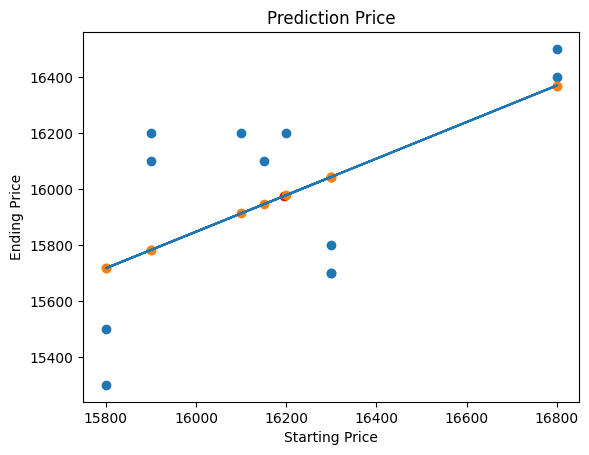

In [32]:
#plotting to compare predicted and actual value
#predicted value are on the linear line showed for the corresponding actual value
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.scatter(df['Starting (USD)'],reg.predict(x))
plt.xlabel('Starting Price')
plt.ylabel('Ending Price')
plt.title('Prediction Price')